<a href="https://colab.research.google.com/github/PosgradoMNA/actividades-del-projecto-team_59/blob/main/Actividad_Sem_04_CD_PCA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Dimension Reduction

-->



In [2]:
# - - - - - - - - - - - - 
import pandas as pd
import numpy as np

# Principal components analysis (PCA) 

* It is a useful method for dimension reduction, especially when the number of variables is large.
* PCA is intended for use with numerical variables. 
   * For categorical variables, other methods such as correspondence analysis are more suitable. 

In [3]:
# - - - - - - - - - - - - 
Credit = 'https://raw.githubusercontent.com/PosgradoMNA/Actividades_Aprendizaje-/main/default%20of%20credit%20card%20clients.csv'

In [4]:
# - - - - - - - - - - - - 
credit_df = pd.read_csv(Credit, index_col = 0)
df = credit_df.copy()
df.index.name =None
df

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X15,X16,X17,X18,X19,X20,X21,X22,X23,Y
1,20000,2.0,2.0,1.0,24.0,2.0,2.0,-1.0,-1.0,-2.0,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1.0
2,120000,2.0,2.0,2.0,26.0,-1.0,2.0,0.0,0.0,0.0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1.0
3,90000,2.0,2.0,2.0,34.0,0.0,0.0,0.0,0.0,0.0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0.0
4,50000,2.0,2.0,1.0,37.0,0.0,0.0,0.0,0.0,0.0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0.0
5,50000,1.0,2.0,1.0,57.0,-1.0,0.0,-1.0,0.0,0.0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29996,220000,1.0,3.0,1.0,39.0,0.0,0.0,0.0,0.0,0.0,...,88004.0,31237.0,15980.0,8500.0,20000.0,5003.0,3047.0,5000.0,1000.0,0.0
29997,150000,1.0,3.0,2.0,43.0,-1.0,-1.0,-1.0,-1.0,0.0,...,8979.0,5190.0,0.0,1837.0,3526.0,8998.0,129.0,0.0,0.0,0.0
29998,30000,1.0,2.0,2.0,37.0,4.0,3.0,2.0,-1.0,0.0,...,20878.0,20582.0,19357.0,0.0,0.0,22000.0,4200.0,2000.0,3100.0,1.0
29999,80000,1.0,3.0,1.0,41.0,1.0,-1.0,0.0,0.0,0.0,...,52774.0,11855.0,48944.0,85900.0,3409.0,1178.0,1926.0,52964.0,1804.0,1.0


In [5]:
# - - - - - - - - - - - - 
# Quitamos los valores nan, sabemos por el análisis de la semana pasada que estos valores tienen un porcentaje
# mínimo, por lo tanto los imputamos con 0
df.fillna(0, inplace=True)

In [20]:
# - - - - - - - - - - - - 
# Comprobando que no existen nan

'''for n in range(len(df)):
  if pd.isna(df.X6[n]):
    print('variable index %i is np.NaN: '%n)
    print(df.X6[n])
  n=n+1
  if n == len(df):
    print('No existen valores NaN')'''

"for n in range(len(df)):\n  if pd.isna(df.X6[n]):\n    print('variable index %i is np.NaN: '%n)\n    print(df.X6[n])\n  n=n+1\n  if n == len(df):\n    print('No existen valores NaN')"

In [6]:
# - - - - - - - - - - - - 
df.shape

(30000, 24)

Se realiza una revisión de la descripción de la BD que se encuentra en la siguiente liga: https://raw.githubusercontent.com/PosgradoMNA/Actividades_Aprendizaje-/main/dataset_info.txt 

Con esta información identificamos las variables Categóricas y Numéricas:

* **X1**: Monto del crédito otorgado (dólar NT), incluye tanto el crédito de consumo individual como su crédito familiar (complementario).
* X2: Sexo (1 = hombre; 2 = mujer).
* X3: Educación (1 = posgrado; 2 = universidad; 3 = secundaria; 4 = otros).
* X4: Estado civil (1 = casado; 2 = soltero; 3 = otros).
* X5: Edad (año).

X6 - X11: Historial de pagos pasados a partir del seguimiento de los registros de pagos mensuales pasados ​​de abril a septiembre del 2005.
* X6 = Estado de pago en septiembre de 2005.
* X7 = El estado de pago en agosto de 2005.
* X8 = El estado de pago en julio de 2005.
* X9 = El estado de pago en junio de 2005.
* X10 = El estado de pago en mayo de 2005.
* X11 = Estado de amortización en abril de 2005 (escala de medición del estado de amortización es: -1 = pagar debidamente; 1 = retraso en el pago de un mes; 2 = retraso en el pago de dos meses; . . .; 8 = retraso en el pago de ocho meses; 9 = retraso en el pago de nueve meses o más).

X12-X17: Importe del estado de cuenta (dólar NT).
* **X12** = monto del estado de cuenta en septiembre de 2005.
* **X13** = monto del estado de cuenta en agosto de 2005.
* **X17** = monto del estado de cuenta en abril de 2005.

X18-X23: Monto del pago anterior (dólar NT).
* **X18** = monto pagado en septiembre de 2005.
* **X19** = monto pagado en agosto de 2005.
* **X20** = monto pagado en julio de 2005.
* **X21** = monto pagado en junio de 2005.
* **X22** = monto pagado en mayo de 2005.
* **X23** = monto pagado en abril de 2005.


Se puede observar que de las 23 variables de entrada, 4 son categóricas y 19 son numéricas. La última columna es la variable binaria de salida (Y) que nos indica probabilidad real de incumplimiento. La variable binaria fue incumplimiento en el pago (Sí = 1; No = 0).

Variables categóricas:
**X2**: Sexo (1 = hombre; 2 = mujer), **X3**: Educación (1 = posgrado; 2 = universidad; 3 = secundaria; 4 = otros), **X4**: Estado civil (1 = casado; 2 = soltero; 3 = otros), **X11** = Estado de amortización en abril de 2005 (escala de medición del estado de amortización es: -1 = pagar debidamente; 1 = retraso en el pago de un mes; 2 = retraso en el pago de dos meses; . . .; 8 = retraso en el pago de ocho meses; 9 = retraso en el pago de nueve meses o más)


---

A continuación procedemos a hacer la revisión de frecuencia de las variables categoricas.

In [31]:
# - - - - - - - - - - - - - - - - - - 
# Se muestra el rango
ndf = df.copy()
ndfRange = ndf.max() - ndf.min()
print('ndfRange:\n',ndfRange)

ndfRange:
 X1      990000.0
X2           2.0
X3           6.0
X4           3.0
X5          79.0
X6          10.0
X7          10.0
X8          10.0
X9          10.0
X10         10.0
X11         10.0
X12    1130091.0
X13    1053708.0
X14    1821353.0
X15    1061586.0
X16    1008505.0
X17    1301267.0
X18     873552.0
X19    1684259.0
X20     896040.0
X21     621000.0
X22     426529.0
X23     528666.0
Y            1.0
dtype: float64


In [32]:
# - - - - - - - - - - - - - - - - 
# Normalización sobre ndf
ndf = ((ndf-ndf.min())/ndfRange).round(4)
ndf

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X15,X16,X17,X18,X19,X20,X21,X22,X23,Y
1,0.0101,1.0,0.3333,0.3333,0.3038,0.4,0.4,0.1,0.1,0.0,...,0.1601,0.0806,0.2610,0.0000,0.0004,0.0000,0.0000,0.0000,0.0000,1.0
2,0.1111,1.0,0.3333,0.6667,0.3291,0.1,0.4,0.2,0.2,0.2,...,0.1632,0.0841,0.2635,0.0000,0.0006,0.0011,0.0016,0.0000,0.0038,1.0
3,0.0808,1.0,0.3333,0.6667,0.4304,0.2,0.2,0.2,0.2,0.2,...,0.1736,0.0955,0.2729,0.0017,0.0009,0.0011,0.0016,0.0023,0.0095,0.0
4,0.0404,1.0,0.3333,0.3333,0.4684,0.2,0.2,0.2,0.2,0.2,...,0.1868,0.1094,0.2837,0.0023,0.0012,0.0013,0.0018,0.0025,0.0019,0.0
5,0.0404,0.5,0.3333,0.3333,0.7215,0.1,0.2,0.1,0.2,0.2,...,0.1799,0.0996,0.2757,0.0023,0.0218,0.0112,0.0145,0.0016,0.0013,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29996,0.2121,0.5,0.5000,0.3333,0.4937,0.2,0.2,0.2,0.2,0.2,...,0.2430,0.1116,0.2733,0.0097,0.0119,0.0056,0.0049,0.0117,0.0019,0.0
29997,0.1414,0.5,0.5000,0.6667,0.5443,0.1,0.1,0.1,0.1,0.2,...,0.1686,0.0858,0.2610,0.0021,0.0021,0.0100,0.0002,0.0000,0.0000,0.0
29998,0.0202,0.5,0.3333,0.6667,0.4684,0.6,0.5,0.4,0.1,0.2,...,0.1798,0.1011,0.2759,0.0000,0.0000,0.0246,0.0068,0.0047,0.0059,1.0
29999,0.0707,0.5,0.5000,0.3333,0.5190,0.3,0.1,0.2,0.2,0.2,...,0.2099,0.0924,0.2986,0.0983,0.0020,0.0013,0.0031,0.1242,0.0034,1.0


# Variables categóricas:

X2, X3, X4, **X5**, X6, X7, X8, X9, x10, X11

# Variables numéricas

X1, X12, X13, X14, X15, X16, X17, X18, X19, X20, X21, X22, X23

In [33]:
# Obtenemos la correlación del data frame ndf
ndf.corr()

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X15,X16,X17,X18,X19,X20,X21,X22,X23,Y
X1,1.000000,0.024770,-0.218940,-0.108023,0.144213,-0.271253,-0.296450,-0.286245,-0.267401,-0.249429,...,0.294033,0.295598,0.290409,0.195295,0.178373,0.210147,0.203307,0.217174,0.219594,-0.153448
X2,0.024770,1.000000,0.014696,-0.031016,-0.090460,-0.057710,-0.070873,-0.065976,-0.060114,-0.055080,...,-0.021745,-0.016875,-0.016658,-0.000060,-0.001347,-0.008490,-0.002163,-0.001585,-0.002744,-0.039821
X3,-0.218940,0.014696,1.000000,-0.142843,0.175663,0.105345,0.121521,0.114022,0.108790,0.097447,...,-0.000340,-0.007467,-0.008994,-0.037420,-0.029974,-0.039897,-0.038232,-0.040295,-0.037110,0.028219
X4,-0.108023,-0.031016,-0.142843,1.000000,-0.413111,0.019904,0.024197,0.032514,0.032989,0.035483,...,-0.023194,-0.025252,-0.021122,-0.005815,-0.008022,-0.003432,-0.012607,-0.001126,-0.006602,-0.024183
X5,0.144213,-0.090460,0.175663,-0.413111,1.000000,-0.039288,-0.050074,-0.052974,-0.049703,-0.053630,...,0.051408,0.049345,0.047758,0.025511,0.021673,0.029115,0.021302,0.022416,0.019465,0.013837
X6,-0.271253,-0.057710,0.105345,0.019904,-0.039288,1.000000,0.672132,0.574452,0.538835,0.509271,...,0.179016,0.180516,0.176897,-0.079255,-0.070079,-0.070490,-0.064025,-0.058177,-0.058685,0.324644
X7,-0.296450,-0.070873,0.121521,0.024197,-0.050074,0.672132,1.000000,0.766738,0.662086,0.622716,...,0.222166,0.221193,0.219297,-0.080713,-0.058952,-0.055856,-0.046894,-0.037064,-0.036516,0.263452
X8,-0.286245,-0.065976,0.114022,0.032514,-0.052974,0.574452,0.766738,1.000000,0.776619,0.685996,...,0.227326,0.225203,0.222366,0.001163,-0.066758,-0.053346,-0.046081,-0.035861,-0.035856,0.235449
X9,-0.267401,-0.060114,0.108790,0.032989,-0.049703,0.538835,0.662086,0.776619,1.000000,0.819933,...,0.245994,0.242916,0.239120,-0.009342,-0.001866,-0.069225,-0.043458,-0.033651,-0.026542,0.216394
X10,-0.249429,-0.055080,0.097447,0.035483,-0.053630,0.509271,0.622716,0.685996,0.819933,1.000000,...,0.271759,0.269563,0.262233,-0.006123,-0.003157,0.008961,-0.058319,-0.033394,-0.023021,0.203889


In [34]:
# Eliminamos las variables categóricas 
VarCat = ['X2', 'X3', 'X4', 'X6', 'X7', 'X8', 'X9', 'X10', 'X11']
ndf = ndf.drop(columns=VarCat)

In [38]:
# Obtenemos la correlación del data frame ndf sin las variables categóricas
ndfc = ndf.corr()
ndfc

,X1,X5,X12,X13,X14,X15,X16,X17,X18,X19,X20,X21,X22,X23,Y
X1,1.000000,0.144213,0.285474,0.278349,0.283273,0.294033,0.295598,0.290409,0.195295,0.178373,0.210147,0.203307,0.217174,0.219594,-0.153448
X5,0.144213,1.000000,0.056500,0.054386,0.053799,0.051408,0.049345,0.047758,0.025511,0.021673,0.029115,0.021302,0.022416,0.019465,0.013837
X12,0.285474,0.056500,1.000000,0.951486,0.892249,0.860271,0.829777,0.802665,0.140349,0.099357,0.156971,0.158370,0.167075,0.179358,-0.019619
X13,0.278349,0.054386,0.951486,1.000000,0.928316,0.892476,0.859773,0.831604,0.280435,0.100863,0.150790,0.147474,0.158005,0.174276,-0.014164
X14,0.283273,0.053799,0.892249,0.928316,1.000000,0.923962,0.883905,0.853333,0.244432,0.316943,0.130113,0.143501,0.179775,0.182356,-0.014038
X15,0.294033,0.051408,0.860271,0.892476,0.923962,1.000000,0.940137,0.900950,0.233097,0.207568,0.300092,0.130297,0.160491,0.177669,-0.010141
X16,0.295598,0.049345,0.829777,0.859773,0.883905,0.940137,1.000000,0.946175,0.217151,0.181261,0.252389,0.293196,0.141655,0.164226,-0.006823
X17,0.290409,0.047758,0.802665,0.831604,0.853333,0.900950,0.946175,1.000000,0.200059,0.172673,0.233839,0.250307,0.307757,0.115503,-0.005323
X18,0.195295,0.025511,0.140349,0.280435,0.244432,0.233097,0.217151,0.200059,1.000000,0.285639,0.252229,0.199627,0.148506,0.185785,-0.072879
X19,0.178373,0.021673,0.099357,0.100863,0.316943,0.207568,0.181261,0.172673,0.285639,1.000000,0.244788,0.180136,0.180929,0.157642,-0.058604


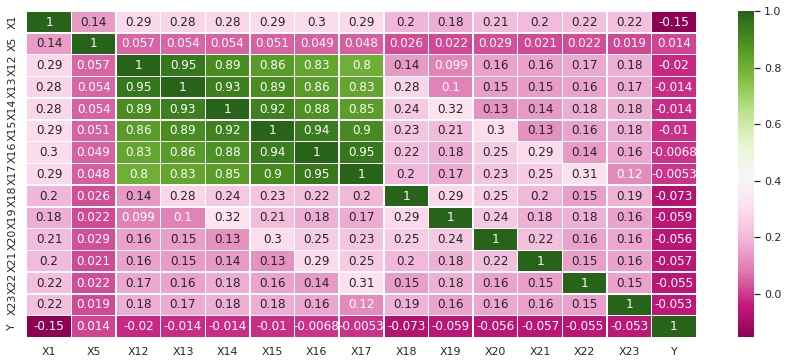

In [40]:
# Creamos la matriz de correlación para ver de forma más sencilla la correlación 
import seaborn as sns
import matplotlib.pyplot as plt 

sns.set(rc={'figure.figsize':(15,6)}) 
sns.heatmap(ndfc, annot=True, linewidths=.5, linecolor='white', cmap="PiYG")
plt.show()

# Normalización de un rango a otro

Formula: 

$$ x_i^{new} = \left( \cfrac{x_{i}^{old} - min{varX}}{rango_{old}}\right) * rango_{nuevo} $$

In [19]:
# - - - - - - - - - - - - - - - - 
# - - - - - - - - - - - - - - - - 
# - - - - - - - - - - - - - - - - 
#print('ndf.min:\n',ndf.min(),'\n')
#print('ndf.max:\n',ndf.max(),'\n')
#ndfRange = ndf.max() - ndf.min()
#print('ndfRange:\n',ndfRange)

# - - - - - - - - - - - - - - - - 
# - - - - - - - - - - - - - - - - 
# - - - - - - - - - - - - - - - - 
def normalizeOneToOtherRange (aList, nLowBound, nUpBound):
  min = np.min(aList)
  max = np.max(aList)
  rango = max - min
  nRango = nUpBound - nLowBound
  return [
      ( (xi - min)/rango) * nRango + nLowBound
      for xi in aList
  ]
# - - - - - - - - - - - - - - - - 
# - - - - - - - - - - - - - - - - 
# - - - - - - - - - - - - - - - - 
def df_normalizeOneToOtherRange (df, df_nLowBound, df_nUpBound):
  df_min = df.min()
  df_max = df.max()
  df_rango = df_max - df_min
  df_nRango = df_nUpBound - df_nLowBound
  #print('df_rango:',df - df_min)

  ((df - df_min) / df_rango) * df_nRango + df_nLowBound
  return 

#ndf = ((ndf-ndf.min())/ndfRange).round(3)
# - - - - - - - - - - - - - - - - 
# - - - - - - - - - - - - - - - - 
# - - - - - - - - - - - - - - - - 
df_min = df['X1']*0-1
df_max = df['X1']*0+1
#print('df_min:',df_min.head(20))
#print('df_max:',df_max)
df_df = df_normalizeOneToOtherRange(df,df_min,df_max)

# - - - - - - - - - - - - - - - - 
# - - - - - - - - - - - - - - - - 
# - - - - - - - - - - - - - - - - 

# Para normalizar será importante al valor de X restarle la media y dividirlo por la desviación estandar
# (x−μ)/σ (que proporciona scikit-learn mediante la función StandardScaler)
# - - - - - - - - - - - - 
print('Media:',df.X13.mean().round(2))
print('Min:',df.X13.min().round(2))
print('Max:',df.X13.max().round(2))
print('Shape:',df.X13.shape)
print('Información:\n',df.X13)

print('- - - - - - - - -\n')
# - - - - - - - - - - - - 
print('Media:',df.X12.mean().round(2))
print('Min:',df.X13.min().round(2))
print('Max:',df.X13.max().round(2))
print('Shape:',df.X12.shape)
print('Información:\n',df.X12)

# NormalizandoFunción de normalización con min-máx
def normalize(x):
    min = np.min(x)
    max = np.max(x)
    range = max - min
    return [(a - min) / range for a in x]

X12norm = df.X12.copy()
X13norm = df.X13.copy()
normalizedValuesX12 = normalize(X12norm)
normalizedValuesX13 = normalize(X13norm)

print(normalizedValuesX12)
print(normalizedValuesX13)


import matplotlib.pyplot as plt
plt.scatter(normalizedValuesX12, normalizedValuesX13)

# Normalizando con la formula (x−μ)/σ
# from sklearn import preprocessing
    
# NormalizandoFunción de normalización con min-máx
def norm0_1(x,desv):
    xmean = x.mean()
    for n in range(x):
      X_norm[n] = x[n]*x.mean/desv
    return X_norm

# - - - - - - - - - - - - 
# Covarianza con normalización la formula (x−μ)/σ

X12scalerA = X12scaler.to_numpy()
X13scalerA = X13scaler.to_numpy()
X12scalerA
#np.cov([X12scalerA, X13scalerA])

# - - - - - - - - - - - - 
# Covarianza con normalización min-max
np.cov([normalizedValuesX12, normalizedValuesX13])


# - - - - - - - - - - - - 
# Covarianza con normalización la formula (x−μ)/σ


#X12_norm = norm0_1(df['X12'],Varience[0,0])

xmean12 = df.X12.mean()
X_norm12=[]
n=0
for n in range(len(df.X12)):
  X_norm12.append(df.X12[n]*xmean12/Varience[0,0])
  n = n+1

xmean13 = df.X13.mean()
X_norm13=[]
n=0
for n in range(len(df.X13)):
  X_norm13.append(df.X13[n]*xmean13/Varience[0,0])
  n = n+1


VarianceNORM = np.cov([X_norm12, X_norm13])
VarianceNORM


# - - - - - - - - - - - - NORMALIZADO
ndfnorm = pd.DataFrame([X_norm12, X_norm13]).transpose(copy = True)
#A=ndform.transpose(copy= True)
print('ndfnorm:\n',ndfnorm)
#ndfnorm = [X_norm12, X_norm13]
#ndform.var().sum()
ndfnorm.var().sum()


# - - - - - - - - - - - - NORMALIZADO
tnorm= ndfnorm.var().sum()
tnorm


# - - - - - - - - - - - - NORMALIZADO
varCnorm = VarianceNORM[0][0]
varRnorm = VarianceNORM[1][1]


# - - - - - - - - - - - - NORMALIZADO
print('Total Varience \t\t\t:', tnorm.round(2) )
print('Varience prop. of X12 \t:', ((varCnorm/tnorm)*100).round(2),'%' )
print('Varience prop. of X13 \t:', ((varRnorm/tnorm)*100).round(2),'%' )


# - - - - - - - - - - - - NORMALIZADO
ndfnorm.corr().round(2)




For each cereal, the data include 19 numerical variables, and we are interested in reducing this dimension.

Principal Component Analysis can tell you what variables in your data are the most important. 

We focus first on two variables: `X12` and `X13`: 

In [41]:
# - - - - - - - - - - - - 
ndfcs = ndfc[['X13', 'X12']]
ndfcs.corr()

,X13,X12
X13,1.000000,0.994267
X12,0.994267,1.000000


In [42]:
# - - - - - - - - - - - - 
Varience = np.cov([ndfcs.X12, ndfcs.X13])
Varience

array([[0.15211383, 0.15324463],
       [0.15324463, 0.15616936]])

In [43]:
Varience[0,0]

0.15211382729479553

In [44]:
# - - - - - - - - - - - -
#ndfcs = ndfc[['X12','X13']]
ndfcs.var().sum()

0.30828318904011015

In [45]:
ndfcs.X12.mean().round(2)

0.44

In [46]:
ndfcs.X13.mean().round(2)

0.45

In [47]:
# - - - - - - - - - - - -
t= ndfcs.var().sum()
t

0.30828318904011015

In [48]:
# - - - - - - - - - - - -
varC = Varience[0][0]
varR = Varience[1][1]

In [49]:
print('Total Varience \t\t:', t.round(2) )
print('Varience prop. of X12 \t:', ((varC/t)*100).round(2),'%' )
print('Varience prop. of X13 \t:', ((varR/t)*100).round(2),'%' )

Total Varience 		: 0.31
Varience prop. of X12 	: 49.34 %
Varience prop. of X13 	: 50.66 %


If we drop `X12` for the sake of dimension reduction, we  lose at least 49.34% of the total variability. 

In [50]:
ndfcs.corr().round(2)

,X13,X12
X13,1.00,0.99
X12,0.99,1.00


Roughly speaking, **99%** of the total variation in both variables is actually “co-variation,” or variation in one variable that is duplicated by similar variation in the other variable. 

Can we use this fact to reduce the number of variables, while making maximum use of their unique contributions to the overall variation? 

Since there is redundancy in the information that the two variables contain, it might be possible to reduce the `two variables` to a `single variable` `without losing` `too much` information. 

The idea in PCA is to find a linear combination of the two variables that contains most, even if not all, of the information, so that this new variable can replace the two original variables.  

The line `z1 (first principal component = PC1)` is the direction in which the variability of the points is largest. 

The `z2 (second principal component = PC2)`-axis is chosen to be perpendicular to the z1-axis.  

In [51]:
import seaborn as sns

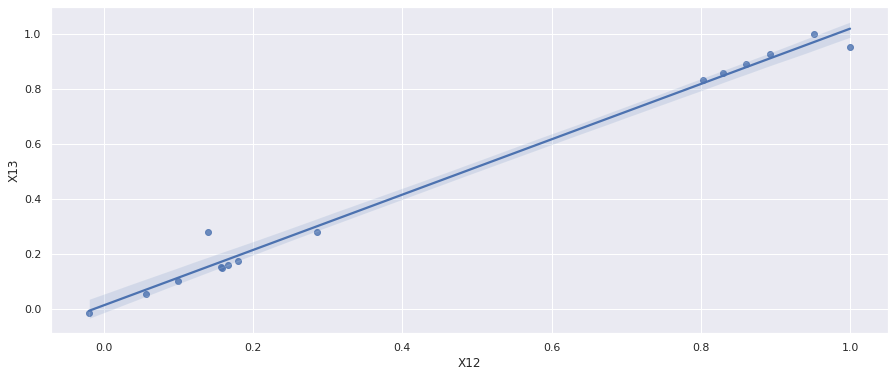

In [52]:
p = sns.regplot(data = ndfcs,  
                x = ndfcs['X12'], 
                y = ndfcs['X13']
               ) 
p

In [57]:
ndfcs.X13.max()

1.0

---
---

The weights for z1 are given by (0.7196, 0.6943): Means, when x axis move 0.7196, y axis move 0.6943 along regression (line fit) line. 

---
---


In [58]:
import numpy as np
from sklearn.decomposition import PCA

In [63]:
pcs = PCA(n_components=2)

pcs.fit(ndfcs[['X12', 'X13']])

pcsSummary = pd.DataFrame({'Standard deviation': np.sqrt(pcs.explained_variance_),
                          'Proportion of variance': pcs.explained_variance_ratio_,
                          'Cumulative proportion': np.cumsum(pcs.explained_variance_ratio_)#column 
                          }
                          )
pcsSummary

,Standard deviation,Proportion of variance,Cumulative proportion
0,0.554436,0.997134,0.997134
1,0.029725,0.002866,1.000000


In [64]:
pcsSummary = pcsSummary.transpose()
pcsSummary.round(4)

,0,1
Standard deviation,0.5544,0.0297
Proportion of variance,0.9971,0.0029
Cumulative proportion,0.9971,1.0000


In [65]:
pcsSummary.columns = ['PC1', 'PC2']
pcsSummary = pcsSummary.round(4)
pcsSummary

,PC1,PC2
Standard deviation,0.5544,0.0297
Proportion of variance,0.9971,0.0029
Cumulative proportion,0.9971,1.0000


The summary gives the reallocated variance: 
* `z1` accounts for 99.71% of the total variability and 
* `z2` for the remaining 0.29%. 

Therefore, if we drop `z2 = PC2`, we still maintain 97.58% of the total variability. 

https://www.youtube.com/watch?v=FgakZw6K1QQ 

### Scree Plot

In [67]:
import matplotlib as mpl
import matplotlib.pyplot as plt

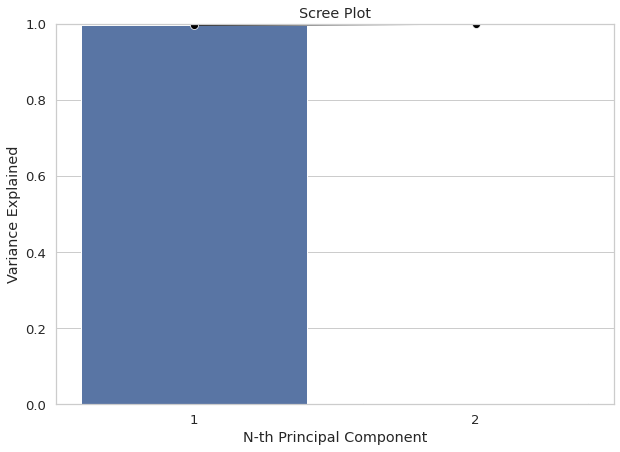

In [68]:
PC_components = np.arange(pcs.n_components_) + 1
#PC_components

_ = sns.set(style = 'whitegrid', 
            font_scale = 1.2
            )

fig, ax = plt.subplots(figsize=(10, 7))

_ = sns.barplot(x = PC_components, 
                y = pcs.explained_variance_ratio_, 
                color = 'b'
                )

_ = sns.lineplot(x = PC_components-1, 
                 y = np.cumsum(pcs.explained_variance_ratio_), 
                 color = 'black', 
                 linestyle = '-', 
                 linewidth = 2, 
                 marker = 'o', 
                 markersize = 8
                 )

plt.title('Scree Plot')
plt.xlabel('N-th Principal Component')
plt.ylabel('Variance Explained')
plt.ylim(0, 1)
plt.show()

* The first principal component has the largest possible variance (that is, accounts for as much of the variability in the data as possible)
* Each succeeding component, in turn, has the highest variance possible under the constraint that it is orthogonal the preceding components.

In [69]:
pcs.components_.round(4) #is the set of all eigenvectors for your projection space (one eigenvector for each principal component).

array([[ 0.7024,  0.7118],
       [-0.7118,  0.7024]])

In [70]:
pcsComponents_df = pd.DataFrame(pcs.components_.transpose(), 
                                columns=['PC1', 'PC2'],
                                index=['X12', 'X13']
                                )
pcsComponents_df

,PC1,PC2
X12,0.702413,-0.711769
X13,0.711769,0.702413


> The first column here shows coefficients of linear combination that defines PC1 (z1)

> The second column shows coefficients for PC2 (z2).

The weights are used to compute principal component scores, which are the projected values of calories and rating onto the new axes (after subtracting the means). 

* The average X12 across the 30,000 rows is `51218.08` and the average X13 is `49172.7`.


* The first column is the projection onto z1 using the weights (0.7196, 0.6943). 

    * The second column is the projection onto z2 using the weights (-0.6943, 	0.7196). 

    
For example:  

First, we need to center the original variables by subtracting column means
(70 − `106.88`)   & (68.4 − `42.67`)

Second multiply them with corresponding Principal components. 

The first score for the 100% Bran cereal (with 70 calories and a rating of 68.4) is 
$$( − 0.847)(70 − 106.88) + (0.532)(68.4 − 42.67) = 44.92$$
$$ Z_i = a_{i1} (X_1 - \bar{X_1}) + a_{i2} (X_2 - \bar{X_2}) + \cdots + a_{in} (X_n - \bar{X_n}) ; i = 1, 2, 3, \cdots n$$

In [73]:
scores = pd.DataFrame(pcs.transform(ndfcs[['X12', 'X13']]),
                      columns=['x', 'y']
                      )
scores.head(10)

,x,y
0,-0.230949,-0.014531
1,-0.551192,-0.008869
2,0.750063,-0.050288
3,0.750517,0.018319
4,0.657885,0.010130
5,0.609914,0.007717
6,0.565216,0.006451
7,0.526124,0.005962
8,-0.331401,0.090229
9,-0.488009,-0.006728


In [ ]:
# - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - 
x = (-0.847)*(70-106.88)+(0.532)*(68.4-42.67)

y = (0.531508)*(70-106.88)+(0.847053)*(68.4-42.67)

In [ ]:
# - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - 
print('For the PC1\n \t x = ', x, '\n\t y = ', y) 

For the PC1
 	 x =  44.92572 
	 y =  2.1926586500000056


In [74]:
scores.x.mean()

-3.700743415417188e-17

In [75]:
scores.y.sum()

-5.885049392251318e-16

The sum of the variances `var(z1) + var(z2)` is equal to the sum of the variances of the original variables, `var(calories) + var(rating)`.  

In [76]:
scores.x.var() + scores.y.var()

0.30828318904011015

In [77]:
ndfcs.X12.var() + ndfcs.X13.var()

0.30828318904011015

In [78]:
((scores.x.var()/
  (scores.x.var()+scores.y.var())
 )*100).round(0)

100.0

In [102]:
# - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -
# Calculamos PCA para toda la matriz
# - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -

pcs = PCA()
#pcs.fit(cereals_df.iloc[:, 3:].dropna(axis=0))
pcs.fit(ndf)
pcsSummary_df = pd.DataFrame({'Standard deviation': np.sqrt(pcs.explained_variance_),
                             'Proportion of variance': pcs.explained_variance_ratio_,
                             'Cumulative proportion': np.cumsum(pcs.explained_variance_ratio_)
                             })
pcsSummary_df = pcsSummary_df.transpose()
pcsSummary_df

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
Standard deviation,0.415607,0.152599,0.117450,0.106728,0.036773,0.033694,0.031934,0.024790,0.020966,0.018756,0.015608,0.011997,0.010433,0.008623,0.006170
Proportion of variance,0.761851,0.102709,0.060843,0.050241,0.005964,0.005007,0.004498,0.002710,0.001939,0.001552,0.001074,0.000635,0.000480,0.000328,0.000168
Cumulative proportion,0.761851,0.864560,0.925403,0.975644,0.981609,0.986616,0.991114,0.993824,0.995763,0.997315,0.998389,0.999024,0.999504,0.999832,1.000000


### Scree Plot

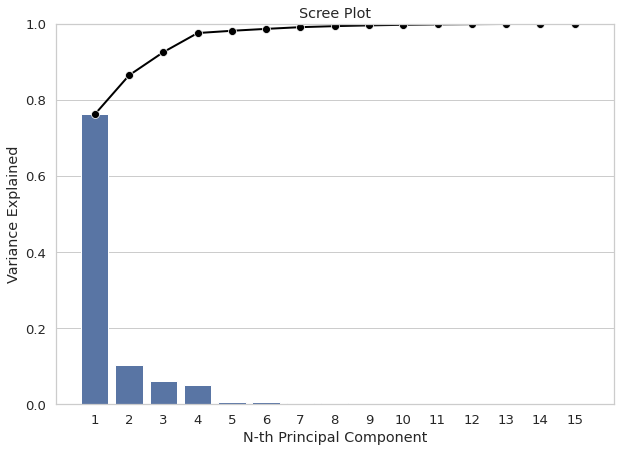

In [103]:
PC_components = np.arange(pcs.n_components_) + 1
#PC_components

_ = sns.set(style = 'whitegrid', 
            font_scale = 1.2
            )

fig, ax = plt.subplots(figsize=(10, 7))

_ = sns.barplot(x = PC_components, 
                y = pcs.explained_variance_ratio_, 
                color = 'b'
                )

_ = sns.lineplot(x = PC_components-1, 
                 y = np.cumsum(pcs.explained_variance_ratio_), 
                 color = 'black', 
                 linestyle = '-', 
                 linewidth = 2, 
                 marker = 'o', 
                 markersize = 8
                 )

plt.title('Scree Plot')
plt.xlabel('N-th Principal Component')
plt.ylabel('Variance Explained')
plt.ylim(0, 1)
plt.show()


Note that the first three components account for more than **93%** of the total variation associated with all 13 of the original variables.

In [104]:
#pcsSummary_df.iloc[1][0]+pcsSummary_df.iloc[1][1]+pcsSummary_df.iloc[1][2]
#OR
((pcsSummary_df.iloc[2][2])*100).round(0)
#type(pcsSummary_df)

93.0

---
---
Con los **primeros 6** componentes principales se capturan el **98%** de la variación.
--- 
---

In [105]:
# Suma de captura de información en componentes
#pcsSummary_df.iloc[1][0]+pcsSummary_df.iloc[1][1]
#OR
((pcsSummary_df.iloc[2][5])*100).round(2)

98.66

In [106]:
# Se le da formato al data frame con la información de componentes principales
pcsSummary_df.columns = ['PC{}'.format(i) for i in range(1, len(pcsSummary_df.columns) + 1)]
pcsSummary_df.round(4)

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14,PC15
Standard deviation,0.4156,0.1526,0.1174,0.1067,0.0368,0.0337,0.0319,0.0248,0.0210,0.0188,0.0156,0.0120,0.0104,0.0086,0.0062
Proportion of variance,0.7619,0.1027,0.0608,0.0502,0.0060,0.0050,0.0045,0.0027,0.0019,0.0016,0.0011,0.0006,0.0005,0.0003,0.0002
Cumulative proportion,0.7619,0.8646,0.9254,0.9756,0.9816,0.9866,0.9911,0.9938,0.9958,0.9973,0.9984,0.9990,0.9995,0.9998,1.0000


In [107]:
pcs.components_

array([[-5.38472537e-02,  3.41797737e-03, -4.17152389e-03,
        -3.42753045e-03, -1.92604384e-03, -2.52535346e-03,
        -2.03199112e-03, -1.36589376e-03, -3.50475138e-03,
        -2.04411750e-03, -2.85472776e-03, -3.69516410e-03,
        -5.13523234e-03, -4.66410006e-03,  9.98477426e-01],
       [ 6.63985871e-01,  2.19768920e-01,  3.25513999e-01,
         3.41113524e-01,  1.91259724e-01,  3.09211165e-01,
         3.04874100e-01,  2.25745936e-01,  3.23932638e-02,
         1.89714405e-02,  3.39747734e-02,  4.05738410e-02,
         5.94435867e-02,  5.48752173e-02,  4.06290922e-02],
       [-2.46405058e-01, -8.36068370e-01,  2.24236657e-01,
         2.40797927e-01,  1.33282046e-01,  2.14239422e-01,
         2.09953209e-01,  1.54470129e-01,  9.37516202e-03,
         3.44485488e-03,  7.15115704e-03,  8.23998469e-03,
         8.77419175e-03,  7.67904262e-03, -7.05357618e-03],
       [-6.98607554e-01,  5.02595688e-01,  2.36934345e-01,
         2.56007432e-01,  1.39596557e-01,  2.18810250

In [108]:
# - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - 
pcsComponents_df = pd.DataFrame(pcs.components_.transpose(), 
                                columns = pcsSummary_df.columns,
                                index = ndf.columns
                                )
pcsComponents_df.iloc[:,:5]

#index = cereals_df.iloc[:, 3:].columns

,PC1,PC2,PC3,PC4,PC5
X1,-0.053847,0.663986,-0.246405,-0.698608,-0.076162
X5,0.003418,0.219769,-0.836068,0.502596,0.007642
X12,-0.004172,0.325514,0.224237,0.236934,-0.195980
X13,-0.003428,0.341114,0.240798,0.256007,-0.178657
X14,-0.001926,0.191260,0.133282,0.139597,-0.021721
X15,-0.002525,0.309211,0.214239,0.218810,0.028544
X16,-0.002032,0.304874,0.209953,0.210860,0.097025
X17,-0.001366,0.225746,0.154470,0.153605,0.241951
X18,-0.003505,0.032393,0.009375,-0.000042,0.095837
X19,-0.002044,0.018971,0.003445,-0.003954,0.093227


In [109]:
ndf.columns

Index(['X1', 'X5', 'X12', 'X13', 'X14', 'X15', 'X16', 'X17', 'X18', 'X19',
       'X20', 'X21', 'X22', 'X23', 'Y'],
      dtype='object')

In [110]:
pcsComponents_dfX = pd.DataFrame(pcs.components_.transpose(), 
                                columns = pcsSummary_df.columns,
                                index = ndf.columns
                                )
pcsComponents_dfX

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14,PC15
X1,-0.053847,0.663986,-0.246405,-0.698608,-0.076162,-0.020956,-0.025599,-0.014223,-0.014023,-0.010459,-0.004098,-0.003522,0.004529,-0.001102,-0.000948
X5,0.003418,0.219769,-0.836068,0.502596,0.007642,-0.001274,0.003925,-0.000129,-0.000818,-0.000724,-0.000365,-0.000357,-0.000243,-0.000007,0.000483
X12,-0.004172,0.325514,0.224237,0.236934,-0.195980,0.423297,-0.228612,0.232068,-0.205188,0.364910,0.088081,0.310524,-0.422106,-0.053425,-0.058506
X13,-0.003428,0.341114,0.240798,0.256007,-0.178657,0.327766,-0.160444,0.105528,0.278576,-0.223608,-0.270709,-0.217156,0.493738,0.102546,0.285555
X14,-0.001926,0.191260,0.133282,0.139597,-0.021721,0.040786,-0.011592,-0.106678,0.104678,-0.246526,0.533663,0.007913,0.244224,0.014699,-0.704317
X15,-0.002525,0.309211,0.214239,0.218810,0.028544,-0.227126,0.155127,-0.396470,0.134932,0.194285,0.187469,-0.518466,-0.295605,-0.305419,0.190744
X16,-0.002032,0.304874,0.209953,0.210860,0.097025,-0.428406,0.259419,0.074412,-0.197257,-0.099599,-0.129102,0.111139,-0.130129,0.676713,-0.001050
X17,-0.001366,0.225746,0.154470,0.153605,0.241951,-0.330171,-0.026420,-0.019448,-0.231885,-0.136778,-0.259901,0.431974,0.236999,-0.591635,-0.011049
X18,-0.003505,0.032393,0.009375,-0.000042,0.095837,0.027239,0.091641,0.051364,0.713208,-0.319497,-0.244263,0.246939,-0.473594,-0.072332,-0.130298
X19,-0.002044,0.018971,0.003445,-0.003954,0.093227,-0.030790,0.063747,-0.030999,0.221803,-0.030809,0.625704,0.444041,0.123426,0.068907,0.571086


Here, it is clear that: 
* the first principal component is dominated by the sodium content of the cereal: 
  * it has the highest (in this case, positive) weight (-0.980215). 
  * This means that the first principal component is in fact measuring how much sodium is in the cereal. 
  
* The second principal component seems to be measuring the amount of potassium. 


**Since both these variables are measured in `milligrams`, whereas the other nutrients are measured in `grams`, the scale is obviously leading to this result.** 

The variances of potassium and sodium are much larger than the variances of the other variables, and thus the total variance is dominated by these two variances. 

**Normalize before applying PCA!!!**

* Normalize and then performing PCA on the correlation matrix instead of the covariance matrix. 
* Using the correlation matrix means that you are operating on the normalized data. 

In [101]:
from sklearn import preprocessing

#### Normalize the 13 variables due to the different scales of the variables and then perform PCA (or equivalently, we use PCA applied to the correlation matrix)

In [120]:
# - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -
# cereals_df.iloc[:, 3:].head()
ndfinal = df.copy()
VarCat = ['X2', 'X3', 'X4', 'X6', 'X7', 'X8', 'X9', 'X10', 'X11', 'Y']
ndfinal = ndfinal.drop(columns=VarCat)
ndfinal

,X1,X5,X12,X13,X14,X15,X16,X17,X18,X19,X20,X21,X22,X23
1,20000,24.0,3913.0,3102.0,689.0,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0
2,120000,26.0,2682.0,1725.0,2682.0,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0
3,90000,34.0,29239.0,14027.0,13559.0,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0
4,50000,37.0,46990.0,48233.0,49291.0,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0
5,50000,57.0,8617.0,5670.0,35835.0,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29996,220000,39.0,188948.0,192815.0,208365.0,88004.0,31237.0,15980.0,8500.0,20000.0,5003.0,3047.0,5000.0,1000.0
29997,150000,43.0,1683.0,1828.0,3502.0,8979.0,5190.0,0.0,1837.0,3526.0,8998.0,129.0,0.0,0.0
29998,30000,37.0,3565.0,3356.0,2758.0,20878.0,20582.0,19357.0,0.0,0.0,22000.0,4200.0,2000.0,3100.0
29999,80000,41.0,-1645.0,78379.0,76304.0,52774.0,11855.0,48944.0,85900.0,3409.0,1178.0,1926.0,52964.0,1804.0


In [121]:
pcs = PCA()
pcs.fit(preprocessing.scale(ndfinal)) 
                # Standardize a dataset along any axis.
                # Center to the mean and component wise scale to unit variance.


PCA()

In [122]:
pcsSummary_df = pd.DataFrame({'Standard deviation': np.sqrt(pcs.explained_variance_),
                             'Proportion of variance': pcs.explained_variance_ratio_,
                             'Cumulative proportion': np.cumsum(pcs.explained_variance_ratio_)
                             })

pcsSummary_df = pcsSummary_df.transpose()
pcsSummary_df.columns = ['PC{}'.format(i) for i in range(1, len(pcsSummary_df.columns) + 1)]
pcsSummary_df.round(4) 

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14
Standard deviation,2.4330,1.3100,1.0223,0.9618,0.9400,0.9342,0.8829,0.8524,0.8411,0.5142,0.2665,0.2027,0.1593,0.1525
Proportion of variance,0.4228,0.1226,0.0746,0.0661,0.0631,0.0623,0.0557,0.0519,0.0505,0.0189,0.0051,0.0029,0.0018,0.0017
Cumulative proportion,0.4228,0.5454,0.6200,0.6861,0.7492,0.8115,0.8672,0.9191,0.9696,0.9885,0.9936,0.9965,0.9983,1.0000


In [123]:
pcsSummary_df.iloc[2,8]

0.9696355620196744

# **R.** 

* Con esto encontramos que necesitamos **9 componentes principales** para capturar el **90%** de la totalidad de la variabilidad. 
* Con los primeros **2 componentes principales** se logra capturar el **51%** de la totalidad de la variabilidad, esto significa que si se reducieran el número de variables principales a 2, se estaría perdiendo una gran cantidad de información. Al menos deberiamos quedarnos con los primeros **7 componentes principales** para capturar al menos el **80%** de la totalidad de la variabilidad. 

In [124]:
pcsComponents_df = pd.DataFrame(pcs.components_.transpose(), 
                                columns=pcsSummary_df.columns,
                                index = ndfinal.columns                                )
pcsComponents_df.iloc[:,:9]

# index=cereals_df.iloc[:, 3:].columns


,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9
X1,0.165483,0.300721,-0.378367,-0.200783,0.034763,-0.077947,0.111254,-0.053279,-0.821623
X5,0.032715,0.071147,-0.869959,0.338170,-0.038886,0.072254,-0.078727,0.029034,0.329878
X12,0.372419,-0.190879,-0.034254,-0.063949,0.041133,-0.044090,0.008146,0.009524,0.010317
X13,0.383236,-0.174682,-0.001679,0.007298,0.083068,-0.029030,-0.032274,-0.135564,0.017996
X14,0.388247,-0.126933,0.034779,0.060394,0.114161,0.098810,-0.121353,0.092674,-0.019373
X15,0.391544,-0.120431,0.034071,0.074763,0.028602,0.014422,0.126401,0.039361,0.018639
X16,0.388490,-0.105953,0.033801,0.039750,-0.106908,-0.099037,-0.007575,0.049855,0.023016
X17,0.380654,-0.094256,0.018626,-0.070263,-0.164914,0.069663,0.007949,0.000452,0.058765
X18,0.135198,0.383280,0.173759,0.361035,0.226258,0.039948,-0.200739,-0.749035,0.026445
X19,0.116819,0.408340,0.200212,0.346460,0.150535,0.407488,-0.279922,0.577088,-0.115223


In [125]:
pcsComponents_df.PC1.idxmax()

'X15'

In [126]:
pcsComponents_df.PC1.nlargest(3)

X15    0.391544
X16    0.388490
X14    0.388247
Name: PC1, dtype: float64

In [127]:
pcsComponents_df.PC2.idxmin()

'X12'

In [128]:
pcsComponents_df.PC2.nsmallest(3)

X12   -0.190879
X13   -0.174682
X14   -0.126933
Name: PC2, dtype: float64

> * 
> * 
> * 

> * The cereal is low in calories and the amount per bowl (cups)
> * The cereal high in protein, and potassium. 
> * This type of cereal is associated with a high consumer rating. 

> The second principal component is most affected by the weight of a serving (cups)

> The third principal component by the carbohydrate (carbo) content

In [130]:
print('*'*55,'FIN','*'*55)

******************************************************* FIN *******************************************************
